In [1]:
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandas.io.json import json_normalize
from pandas.tseries import converter as pdtc
from sklearn.svm import SVR
import matplotlib.units as munits
from keras.layers import Dropout
from keras.regularizers import l2
from datetime import datetime
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from sklearn.linear_model import LinearRegression
from scipy import stats
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from functools import reduce
from datetime import datetime
from keras.optimizers import SGD
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas import read_csv
from pandas.plotting import scatter_matrix
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout, Lambda, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import chart_studio.plotly as py
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import keras
import json
import os
import sklearn
from datetime import datetime
from dateutil.parser import parse
import findspark
findspark.init()
from pyspark.sql.functions import percent_rank
from pyspark.sql import Window
from pyspark.ml.regression import GBTRegressor
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession
from sklearn.utils import parallel_backend
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import datasets
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from joblibspark import register_spark
import numpy as np
from pyspark.sql import Window
from sklearn import model_selection
pd.set_option('display.max_rows', None)

Using TensorFlow backend.


In [2]:
#Initialize spark session
spark = SparkSession \
        .builder \
        .appName("ensemble_learning_sparktest") \
        .getOrCreate()

# Registers spark for SKLearn parallel backend
register_spark()

In [3]:
def concatenate_json_to_df(directory_path, to_output, folder_output):
    list_json = []
    
    for file in os.listdir(directory_path):
        if file.split(".")[-1] == "json":
            
            with open(directory_path+file, 'r') as f:
            
                # If json file is not empty
                if os.stat(directory_path+file).st_size != 0:
                                
                        
                    # For Observation file type
                    if directory_path.split("/")[-2] == "Observations":
                        dictio = json.load(f)
                                            
                        if 'observation' in dictio:
                            observation = dictio["observation"]
                        
                            for entry in observation:
                                entry['date'] =  file.rstrip(".json")
                                entry['station'] = dictio['station']
                                entry['time'] = datetime.utcfromtimestamp(entry['time']).strftime('%d-%m-%Y %H:%M:%S')
                                list_json.append(entry)
                    
                    
                    # For Analyses file type
                    elif directory_path.split("/")[-2] == "Analyses":
                        dictio = json.load(f)
                        if 'source' in dictio and 'temperature' in dictio:
                            source = list(dictio['source'])
                            temperature = list(dictio['temperature'])
                            
                            dictio['date'] = file.rstrip(".json")
                            dictio.pop('source', None)
                            dictio.pop('temperature', None)
                            
                            entry = dict()
                            for i in range(0, len(source)):
                                dictio[source[i]] = temperature[i]
                                list_json.append(dictio)

                                
                    # For Previsions file type
                    elif "Previsions" in directory_path.split("/"):
                        dictio = json.load(f)
                        
                        latit_r = None
                        long_r = None
                        
                        if "longitude_r" in dictio:
                            long_r = dictio['longitude_r']

                        if "latitude_r" in dictio:
                            latit_r = dictio['latitude_r']
                            
                        if 'forecast' in dictio:
                            forecast = dictio['forecast'] 
                            
                            
                            for i in range(0, len(forecast)):
                                dictio = dict()
                                
                                if long_r != None and latit_r != None:
                                    dictio['latitude_r'] = latit_r
                                    dictio['longitude_r'] = long_r
                                
                                if "temperature" in forecast[i]:
                                    dictio["temperature"] = forecast[i]["temperature"]
                                    
                                if "time" in forecast[i]:
                                    dictio["time"] = datetime.utcfromtimestamp(forecast[i]["time"]).strftime('%d-%m-%Y %H:%M:%S')
                                    
                                if "wind" in forecast[i]:
                                    dictio["wind"] = forecast[i]["wind"]
                                
                                if "wind_dir" in forecast[i]:
                                    dictio["wind_dir"] = forecast[i]["wind_dir"]
                                
                                if "humidity" in forecast[i]:
                                    dictio["humidity"] = forecast[i]["humidity"]
                                
                                if "pressure" in forecast[i]:
                                            dictio["pressure"] = forecast[i]["pressure"]
                                        
                                if "cloud_cover" in forecast[i]:
                                            dictio["cloud_cover"] = forecast[i]["cloud_cover"]

    
                                
                                dictio["date"] = file.rstrip(".json")
                                
                                list_json.append(dictio)
                
                
                else:
                    dictio = dict()
                    dictio["date"] = file.rstrip(".json")
                    list_json.append(dictio)
                                    
    df = pd.DataFrame(list_json)
    df.drop_duplicates()
    df.to_csv(folder_output+"/"+to_output.replace("/", "-")+".csv", sep=";", index=False)
    
    
dirname = "technical_challenge_v9"
if not os.path.exists(dirname):
    os.mkdir(dirname)
    
concatenate_json_to_df('technical_challenge/Asport CAPRED/Previsions/Api-Agro/', "Asport CAPRED/Previsions/Api-Agro", dirname)
# Launch data of Api, Dark and weatherbit forcesaters for the station Asport
path = "technical_challenge_v9/Asport CAPRED-Previsions-"
path_previsions = ["Api-Agro.csv", "Dark Sky.csv", "Weatherbit.csv"]
path_observations = "technical_challenge_v9/Asport CAPRED-Observations.csv"

def get_forecast(path, path_previsions, path_observations):
    list_data = []
    for forecaster in path_previsions:
        dataframe = pd.read_csv(path + forecaster, sep=";")
        dataframe["time"] = pd.to_datetime(dataframe['time'], format='%d-%m-%Y %H:%M:%S')
        dataframe.sort_values(by=['time'])
        dataframe['time'] = dataframe['time'].apply(lambda x: x.replace(minute=0, second=0))
        dataframe = dataframe.groupby(['time']).apply(lambda x : x.iloc[:6].mean())
        dataframe.columns = [x + "_" + forecaster.split('.')[0] for x in dataframe.columns]
        list_data.append(dataframe)   
    
    observation_data = pd.read_csv(path_observations, sep=";", index_col=False).drop(columns=["station"]).dropna()
    observation_data["time"] = pd.to_datetime(observation_data['time'], format='%d-%m-%Y %H:%M:%S')
    observation_data.sort_values(by='time')
    observation_data['time'] = observation_data['time'].apply(lambda x: x.replace(minute=0, second=0))
    observation_data = observation_data.groupby(['time']).apply(lambda x : x.iloc[0])
    observation_data=observation_data.rename(index=str, columns={"humidity": "humidity_Y", "precipitation": "precipitation_Y", "temperature": "temperature_Y"})
    
    return list_data, observation_data

# Associate X to previsions and Y to observations 
list_data, observation_data = get_forecast(path, path_previsions, path_observations)
X = pd.concat(list_data, axis=1)
Y = observation_data

# Delete non useful variable in prevision data
X = X.loc[:, ~X.columns.str.startswith('l')]
X = X.loc[:, ~X.columns.str.startswith('c')]
X = X.loc[:, ~X.columns.str.startswith('p')]
X = X.loc[:, ~X.columns.str.startswith('wind_dir')]
X = X.loc[:, ~X.columns.str.startswith('prec')]
X = X.loc[:, ~X.columns.str.startswith('date')]
X = X.loc[:, ~X.columns.str.startswith('time')]

In [4]:
# Delete non useful variable in observation data
Y = Y.drop(['date','time'], axis=1)

# Import JSON API in order to collect most recent data
import json,urllib.request
data_A = urllib.request.urlopen("http://sd-59247.dedibox.fr/agriscope/obs/transform_obs.php?STATION=Asport").read()
output_A = json.loads(data_A)

# Transform JSON data in a dataframe A
A = json.loads(data_A)
A_data = pd.DataFrame(A)
A = A_data.T

# Delelte the index of the dataframe A
A.index.name = 'time'
A.reset_index(level=0, inplace=True)

# Convert date time in correct format 
A['time'] = pd.to_datetime(A['time'])
A['time'] = pd.to_datetime(A['time'],'%d-%m-%Y %H:%M:%S')
A['time'] = A['time'].apply(lambda x: x.replace(minute=0, second=0))

# Rename dataframe A columns
A.columns = ['time', 'temperature_Y', 'precipitation_Y', 'humidity_Y']

# Reset the index of the dataframe A
A = A.set_index('time') 


In [5]:
# Concat vertically Y and A (Y contains former observation and A most recent one)
frames = [Y, A]
first_concat = pd.concat(frames)

# Merge X and Y dataframe in one single dataframe "df_forcast_cap"
df_forcast_cap = pd.merge(X, first_concat, right_index=True, left_index=True)
df_forcast_cap = df_forcast_cap.drop(['precipitation_Y'], axis=1)

# Delete missing values for "df_forcast_cap"
df_forcast_cap = df_forcast_cap.dropna()

/Users/will/miniconda3/envs/ISEP/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [6]:
# Pyarrow optimization for pandas dataframe to spark dataframe conversion 

#spark.conf.set("spark.sql.execution.arrow.enabled", "true") NEED TO FIX PyARROW VERSION

In [7]:
# Reset index and keep timestamps (Timestamps needed later for efficient data partition)
df_forcast_cap.reset_index(drop=False, inplace=True)

In [8]:
# Convert pandas to dataframe
train_df = spark.createDataFrame(df_forcast_cap) #dataframe

## Layer 1

In [9]:
# Split the data into training and test sets 
train_df = train_df.withColumn("rank", percent_rank().over(Window.partitionBy().orderBy("time")))

trainingData_nv = train_df.where("rank <= .75").drop("rank")
testData_nv = train_df.where("rank > .75").drop("rank")

In [10]:
# Compress data points into feature vector
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=["temperature_Api-Agro", "wind_Api-Agro", "humidity_Api-Agro", \
                                      "humidity_Dark Sky", "temperature_Dark Sky", "wind_Dark Sky", \
                                      "humidity_Weatherbit", "temperature_Weatherbit", "wind_Weatherbit" \
                                      ],outputCol="features")
trainingData = assembler.transform(trainingData_nv)
testData = assembler.transform(testData_nv)

In [11]:
# Create df with temperature_Y as label 
trainingData = trainingData.selectExpr("time", "temperature_Y as label", "features")
testData = testData.selectExpr("time", "temperature_Y as label", "features")

In [12]:
# Information about train and test and X variables
print('X: %d' % (train_df.count()))
print('Training X: %d' % (trainingData.count()))
print('Testing X: %d' % (testData.count()))

X: 2131
Training X: 1598
Testing X: 533


In [13]:
# Train a RandomForest model.
rf = RandomForestRegressor(featuresCol="features")
model = rf.fit(trainingData)

In [14]:
# Make predictions
rf_predictions = model.transform(testData)

# Display example rows
rf_predictions.select("time", "prediction", "label", "features").show(10)

# Compute RMS error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(rf_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(rf_predictions)

+-------------------+------------------+-----+--------------------+
|               time|        prediction|label|            features|
+-------------------+------------------+-----+--------------------+
|2019-08-01 14:00:00|31.839546319125038| 30.9|[32.2347653333333...|
|2019-08-01 15:00:00| 31.49031203945122| 31.3|[32.2937658333333...|
|2019-08-01 16:00:00|30.369671864275695| 30.4|[30.8703041666666...|
|2019-08-01 17:00:00|  29.3650350938859| 29.4|[30.1431720000000...|
|2019-08-01 18:00:00|28.191390085418675| 28.5|[28.593164,7.8602...|
|2019-08-01 19:00:00|25.449858868773866| 26.8|[26.7010746666666...|
|2019-08-01 20:00:00|23.599268813337087| 25.0|[25.1312506666666...|
|2019-08-01 21:00:00|21.957998438409525| 22.3|[23.9602703333333...|
|2019-08-01 22:00:00|20.988394497975715| 19.6|[23.053451,2.3277...|
|2019-08-01 23:00:00| 20.84925397121483| 18.3|[22.6442713333333...|
+-------------------+------------------+-----+--------------------+
only showing top 10 rows

Root Mean Squared Erro

In [15]:
# Initialize and train GBR
gbr = GBTRegressor(featuresCol="features", labelCol = "label", maxIter=100)
model = gbr.fit(trainingData)

In [16]:
# Make predictions
gbr_predictions = model.transform(testData)

# Display example rows
gbr_predictions.select("time", "prediction", "label", "features").show(10)

# Compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(gbr_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+-------------------+------------------+-----+--------------------+
|               time|        prediction|label|            features|
+-------------------+------------------+-----+--------------------+
|2019-08-01 14:00:00|31.287133750629085| 30.9|[32.2347653333333...|
|2019-08-01 15:00:00| 31.52636486471717| 31.3|[32.2937658333333...|
|2019-08-01 16:00:00|30.300450721461743| 30.4|[30.8703041666666...|
|2019-08-01 17:00:00|29.253536596319943| 29.4|[30.1431720000000...|
|2019-08-01 18:00:00|27.770580319621725| 28.5|[28.593164,7.8602...|
|2019-08-01 19:00:00| 24.69750877142503| 26.8|[26.7010746666666...|
|2019-08-01 20:00:00| 23.18562206417946| 25.0|[25.1312506666666...|
|2019-08-01 21:00:00|20.521948624861672| 22.3|[23.9602703333333...|
|2019-08-01 22:00:00| 18.49917640663606| 19.6|[23.053451,2.3277...|
|2019-08-01 23:00:00|18.724837748181884| 18.3|[22.6442713333333...|
+-------------------+------------------+-----+--------------------+
only showing top 10 rows

Root Mean Squared Erro

In [17]:
#Initialize data for MLP

train=trainingData_nv.toPandas()
test=testData_nv.toPandas()

train = train.drop('time', axis=1)
test = test.drop('time', axis=1)

X=train.drop(['temperature_Y', 'humidity_Y'],axis=1)
Y=train['temperature_Y']

x=test.drop(['temperature_Y', 'humidity_Y'],axis=1)
y=test['temperature_Y']

#Move data to numpy array

X = np.array(X) #Train 
Y = np.array(Y) 
x = np.array(x) #Test
y = np.array(y) 

In [18]:
#Initialize MLP model

mlp = MLPRegressor(
    hidden_layer_sizes=(6,), activation='relu', solver='adam', alpha=0.001, batch_size=10,
    learning_rate='constant', learning_rate_init=0.03, power_t=0.5, max_iter=3000, shuffle=True,
    random_state=9, tol=0.001, verbose='optional', warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [19]:
mlp.fit(X, Y)

pred_train = mlp.predict(X)
pred_test = mlp.predict(x)

Iteration 1, loss = 10.75372047
Iteration 2, loss = 2.49595051
Iteration 3, loss = 1.76413521
Iteration 4, loss = 1.51532504
Iteration 5, loss = 1.38760141
Iteration 6, loss = 1.55822882
Iteration 7, loss = 1.31603594
Iteration 8, loss = 1.19874467
Iteration 9, loss = 1.34175029
Iteration 10, loss = 1.28441641
Iteration 11, loss = 1.20249594
Iteration 12, loss = 1.12227393
Iteration 13, loss = 1.13001847
Iteration 14, loss = 1.14448588
Iteration 15, loss = 1.14102935
Iteration 16, loss = 1.32650562
Iteration 17, loss = 1.14374845
Iteration 18, loss = 1.25308524
Iteration 19, loss = 1.08928102
Iteration 20, loss = 1.36482187
Iteration 21, loss = 1.13116490
Iteration 22, loss = 1.23182704
Iteration 23, loss = 1.18147345
Iteration 24, loss = 1.14140815
Iteration 25, loss = 1.14163918
Iteration 26, loss = 1.19274361
Iteration 27, loss = 1.10718319
Iteration 28, loss = 1.13234048
Iteration 29, loss = 1.18779089
Iteration 30, loss = 1.41073945
Training loss did not improve more than tol=0.00

In [20]:
#creating function for error and accurace
def evaluate(test_features, test_labels):
    #predictions = model.predict(test_features)
    errors = abs(pred_test - y)
    mape = 100 * np.mean(errors / y)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

evaluate(x,y)

#calculating rmse for train and test data
rmse_train=np.sqrt((Y - pred_train) ** 2).mean()
print("train_rmse:{:0.4f}".format(rmse_train))

rmse_test=np.sqrt((pred_test - y) ** 2).mean()
print("test_rmse:{:0.4f}".format(rmse_test))


Model Performance
Average Error: 1.6615 degrees.
Accuracy = 93.32%.
train_rmse:1.4356
test_rmse:1.6615


In [21]:
dataset = pd.DataFrame({'mlp_prediction': pred_test})
mlp_predictions = spark.createDataFrame(dataset)

# Layer 2

In [22]:
# Concatenate results from RF, GBR, MLP
rf_predictions = rf_predictions.drop("features").withColumnRenamed("prediction", "rf_prediction")
gbr_predictions = gbr_predictions.drop("label","features").withColumnRenamed("prediction", "gbr_prediction")

concatenated_predictions = (rf_predictions
        .join(gbr_predictions, on=['time'], how='inner'))

In [23]:
from pyspark.sql.functions import row_number
from pyspark.sql.functions import lit
w = Window().orderBy()

df1 =  concatenated_predictions.withColumn("row_id", row_number().over(Window.orderBy(lit(("1")))))

df2 =  mlp_predictions.withColumn("row_id", row_number().over(Window.orderBy(lit(("1")))))

In [24]:
concatenated_predictions = (df1
        .join(df2, on=['row_id'], how='inner')
        .drop('row_id'))

In [25]:
# Split the data into training and test sets 
ndf = concatenated_predictions.withColumn("rank", percent_rank().over(Window.partitionBy().orderBy("time")))

trainingData_nv = ndf.where("rank <= .75").drop("rank")
testData_nv = ndf.where("rank > .75").drop("rank")

In [26]:
# Compress features into feature vector
assembler = VectorAssembler(inputCols=["rf_prediction", "gbr_prediction", "mlp_prediction"],outputCol="features")
trainingData = assembler.transform(trainingData_nv)
testData = assembler.transform(testData_nv)

trainingData = trainingData.selectExpr("time", "label", "features")
testData = testData.selectExpr("time", "label", "features")

In [27]:
# Information about train and test and X variables
print('X: %d' % (concatenated_predictions.count()))
print('Training X: %d' % (trainingData.count()))
print('Testing X: %d' % (testData.count()))

X: 533
Training X: 400
Testing X: 133


In [28]:
# Train RandomForest model
rf = RandomForestRegressor(featuresCol="features")
model = rf.fit(trainingData)

In [29]:
# Make predictions
rf_predictions = model.transform(testData)

# Display example rows
rf_predictions.select("time","prediction", "label", "features").show(10)

# Compute RMS error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(rf_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(rf_predictions)

+-------------------+------------------+-----+--------------------+
|               time|        prediction|label|            features|
+-------------------+------------------+-----+--------------------+
|2019-08-18 06:00:00|22.064904432404948| 21.6|[20.9412750793537...|
|2019-08-18 07:00:00| 22.32438629406864| 21.6|[21.7407709563457...|
|2019-08-18 08:00:00|22.175922931156084| 22.3|[23.1962380251637...|
|2019-08-18 09:00:00|23.107283764437756| 23.3|[24.2241475626454...|
|2019-08-18 10:00:00|26.058678125745207| 24.4|[25.6891387166051...|
|2019-08-18 11:00:00| 27.61599540944234| 25.0|[27.3894302680568...|
|2019-08-18 12:00:00|27.276778225787133| 26.6|[27.5499234350206...|
|2019-08-18 13:00:00|27.766271386749672| 27.8|[27.7871610214442...|
|2019-08-18 14:00:00|27.683104145572457| 28.4|[27.6266678544804...|
|2019-08-18 15:00:00| 27.42070272285103| 28.0|[27.3416550882927...|
+-------------------+------------------+-----+--------------------+
only showing top 10 rows

Root Mean Squared Erro

Text(0, 0.5, 'Temperature (C°)')

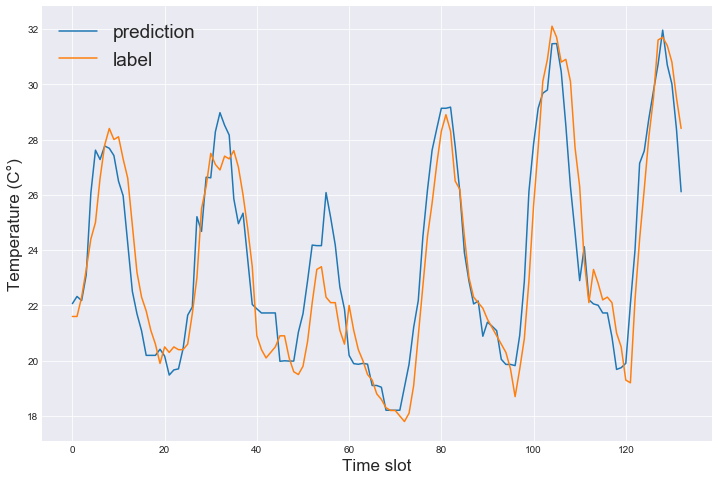

In [30]:
# Chart comparaison between predicted and actual values
pand = rf_predictions.select("prediction", "label")
df = pand.toPandas()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.plot(df)
plt.legend(df, fontsize=19)
plt.xlabel("Time slot", fontsize=17)
plt.ylabel("Temperature (C°)", fontsize=17)

In [31]:
# Initialize GBR
gbr = GBTRegressor(featuresCol="features", labelCol = "label", maxIter=100)

# Train model using same data structure as RandomForest
model = gbr.fit(trainingData)

In [32]:
# Make predictions
gbr_predictions = model.transform(testData)

# Display example rows
gbr_predictions.select("prediction", "label", "features").show(10)

# Compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(gbr_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+------------------+-----+--------------------+
|        prediction|label|            features|
+------------------+-----+--------------------+
|23.917024728134855| 21.6|[20.9412750793537...|
|23.842697058765122| 21.6|[21.7407709563457...|
|20.451714872610953| 22.3|[23.1962380251637...|
| 20.94771461359834| 23.3|[24.2241475626454...|
| 26.11769949379874| 24.4|[25.6891387166051...|
|27.531795826406487| 25.0|[27.3894302680568...|
|24.732316408822083| 26.6|[27.5499234350206...|
| 27.22349360217021| 27.8|[27.7871610214442...|
| 27.22349360217021| 28.4|[27.6266678544804...|
|26.251417235494305| 28.0|[27.3416550882927...|
+------------------+-----+--------------------+
only showing top 10 rows

Root Mean Squared Error (RMSE) on test data = 1.84843


In [33]:
#Initialize data for MLP

train = trainingData_nv.toPandas()
test = testData_nv.toPandas()

train = train.drop('time', axis=1)
test = test.drop('time', axis=1)

X=train.drop(['label'],axis=1)
Y=train['label']

x=test.drop(['label'],axis=1)
y=test['label']

# Move data to numpy array

X = np.array(X) #Train 
Y = np.array(Y) 
x = np.array(x) #Test
y = np.array(y) 

In [34]:
#Initialize MLP model

mlp = MLPRegressor(
    hidden_layer_sizes=(6,),  activation='relu', solver='adam', alpha=0.001, batch_size=10,
    learning_rate='constant', learning_rate_init=0.03, power_t=0.5, max_iter=3000, shuffle=True,
    random_state=9, tol=0.001, verbose='optional', warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [35]:
mlp.fit(X, Y)

pred_train = mlp.predict(X)
pred_test = mlp.predict(x)

Iteration 1, loss = 14.84924575
Iteration 2, loss = 1.24775269
Iteration 3, loss = 1.08092498
Iteration 4, loss = 1.03734947
Iteration 5, loss = 1.02986972
Iteration 6, loss = 1.05552659
Iteration 7, loss = 1.18278688
Iteration 8, loss = 1.04401395
Iteration 9, loss = 1.06792444
Iteration 10, loss = 1.12524015
Iteration 11, loss = 1.16194952
Iteration 12, loss = 1.20493428
Iteration 13, loss = 1.04368222
Iteration 14, loss = 1.07833338
Iteration 15, loss = 1.08040115
Iteration 16, loss = 1.00085349
Iteration 17, loss = 1.09807858
Iteration 18, loss = 1.09417147
Iteration 19, loss = 1.05071422
Iteration 20, loss = 1.04467070
Iteration 21, loss = 1.03008226
Iteration 22, loss = 1.17374415
Iteration 23, loss = 1.03900986
Iteration 24, loss = 1.11746189
Iteration 25, loss = 1.09926636
Iteration 26, loss = 1.01943556
Iteration 27, loss = 1.03861047
Training loss did not improve more than tol=0.001000 for 10 consecutive epochs. Stopping.


In [36]:
evaluate(x,y)

#calculating rmse for train and test data
rmse_train=np.sqrt((Y - pred_train) ** 2).mean()
print("train_rmse:{:0.4f}".format(rmse_train))

rmse_test=np.sqrt((pred_test - y) ** 2).mean()
print("test_rmse:{:0.4f}".format(rmse_test))

Model Performance
Average Error: 1.0997 degrees.
Accuracy = 95.35%.
train_rmse:1.1041
test_rmse:1.0997


In [37]:
dataset = pd.DataFrame({'mlp_prediction_2': pred_test})
mlp_predictions = spark.createDataFrame(dataset)

# Layer 3

In [38]:
# Concatenate results from RF, GBR, MLP

rf_predictions = rf_predictions.drop("features").withColumnRenamed("prediction", "rf_prediction_2")
gbr_predictions = gbr_predictions.drop("label","features").withColumnRenamed("prediction", "gbr_prediction_2")

concatenated_predictions = (rf_predictions
        .join(gbr_predictions, on=['time'], how='inner'))

In [39]:
# Concatenation 

w = Window().orderBy()

df1 =  concatenated_predictions.withColumn("row_id", row_number().over(Window.orderBy(lit(("1")))))
df2 =  mlp_predictions.withColumn("row_id", row_number().over(Window.orderBy(lit(("1")))))

concatenated_predictions = (df1
        .join(df2, on=['row_id'], how='inner')
        .drop('row_id'))

In [40]:
# Split the data into training and test sets 
concatenated_predictions = concatenated_predictions.withColumn("rank", percent_rank().over(Window.partitionBy().orderBy("time")))
trainingData_nv = concatenated_predictions.where("rank <= .75").drop("rank")
testData_nv = concatenated_predictions.where("rank > .75").drop("rank")

In [41]:
# Compress features into feature vector
assembler = VectorAssembler(inputCols=["rf_prediction_2", "gbr_prediction_2", "mlp_prediction_2"],outputCol="features")
trainingData = assembler.transform(trainingData_nv)
testData = assembler.transform(testData_nv)

trainingData = trainingData.selectExpr("time", "label", "features")
testData = testData.selectExpr("time", "label", "features")

In [42]:
# Information about train and test and X variables
print('X: %d' % (concatenated_predictions.count()))
print('Training X: %d' % (trainingData.count()))
print('Testing X: %d' % (testData.count()))

X: 133
Training X: 100
Testing X: 33


In [43]:
# Train RandomForest model
rf = RandomForestRegressor(featuresCol="features")
model = rf.fit(trainingData)

In [44]:
# Make predictions
rf_predictions = model.transform(testData)

# Display example rows
rf_predictions.select("time","prediction", "label", "features").show(10)

# Compute RMS error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(rf_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(rf_predictions)

+-------------------+------------------+-----+--------------------+
|               time|        prediction|label|            features|
+-------------------+------------------+-----+--------------------+
|2019-08-22 10:00:00| 27.01712968975469| 25.6|[27.8333914732070...|
|2019-08-22 11:00:00|27.472929292929297| 27.7|[29.1338493980647...|
|2019-08-22 12:00:00|28.407357142857155| 30.1|[29.6750432462448...|
|2019-08-22 13:00:00|28.129944444444455| 30.9|[29.7926934177667...|
|2019-08-22 14:00:00|28.407357142857155| 32.1|[31.4647797204973...|
|2019-08-22 15:00:00|28.407357142857155| 31.7|[31.4713697998624...|
|2019-08-22 16:00:00|28.407357142857155| 30.8|[30.4526610596570...|
|2019-08-22 17:00:00|27.565382936507937| 30.9|[28.5048013897587...|
|2019-08-22 18:00:00|26.300737785262548| 30.1|[26.2951556941668...|
|2019-08-22 19:00:00|  25.1961711296959| 27.7|[24.6323482650913...|
+-------------------+------------------+-----+--------------------+
only showing top 10 rows

Root Mean Squared Erro

In [45]:
# Initialize GBR
gbr = GBTRegressor(featuresCol="features", labelCol = "label", maxIter=100)

# Train model using same data structure as RandomForest
model = gbr.fit(trainingData)

In [46]:
# Make predictions
gbr_predictions = model.transform(testData)

# Display example rows
gbr_predictions.select("time","prediction", "label", "features").show(10)

# Compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(gbr_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+-------------------+------------------+-----+--------------------+
|               time|        prediction|label|            features|
+-------------------+------------------+-----+--------------------+
|2019-08-22 10:00:00|26.899534242733328| 25.6|[27.8333914732070...|
|2019-08-22 11:00:00| 28.80522374556438| 27.7|[29.1338493980647...|
|2019-08-22 12:00:00|28.703884539606708| 30.1|[29.6750432462448...|
|2019-08-22 13:00:00|28.301573972840163| 30.9|[29.7926934177667...|
|2019-08-22 14:00:00|28.703884539606708| 32.1|[31.4647797204973...|
|2019-08-22 15:00:00|28.703884539606708| 31.7|[31.4713697998624...|
|2019-08-22 16:00:00|28.703884539606708| 30.8|[30.4526610596570...|
|2019-08-22 17:00:00| 27.04790888131345| 30.9|[28.5048013897587...|
|2019-08-22 18:00:00|27.934002645400138| 30.1|[26.2951556941668...|
|2019-08-22 19:00:00|26.989734834112404| 27.7|[24.6323482650913...|
+-------------------+------------------+-----+--------------------+
only showing top 10 rows

Root Mean Squared Erro

In [47]:
#Initialize data for MLP

train = trainingData_nv.toPandas()
test = testData_nv.toPandas()

train = train.drop('time', axis=1)
test = test.drop('time', axis=1)

In [48]:
X=train.drop(['label'],axis=1)
Y=train['label']

x=test.drop(['label'],axis=1)
y=test['label']

#shaping the data in numpy array

X = np.array(X) #Train 
Y = np.array(Y) #Train
x = np.array(x) #Test
y = np.array(y) #Test

In [49]:
#Initialize MLP model

mlp = MLPRegressor(
    hidden_layer_sizes=(6,),  activation='relu', solver='adam', alpha=0.001, batch_size=10,
    learning_rate='constant', learning_rate_init=0.03, power_t=0.5, max_iter=3000, shuffle=True,
    random_state=9, tol=0.001, verbose='optional', warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [50]:
mlp.fit(X, Y)

pred_train = mlp.predict(X)
pred_test = mlp.predict(x)

Iteration 1, loss = 32.96769728
Iteration 2, loss = 8.50132785
Iteration 3, loss = 4.14349691
Iteration 4, loss = 2.01273571
Iteration 5, loss = 1.40488158
Iteration 6, loss = 1.25465364
Iteration 7, loss = 1.25861306
Iteration 8, loss = 1.28444870
Iteration 9, loss = 1.19034225
Iteration 10, loss = 1.24016752
Iteration 11, loss = 1.29113233
Iteration 12, loss = 1.27346097
Iteration 13, loss = 1.28783605
Iteration 14, loss = 1.43316290
Iteration 15, loss = 1.39460998
Iteration 16, loss = 1.12733373
Iteration 17, loss = 1.20378897
Iteration 18, loss = 1.27366239
Iteration 19, loss = 1.16635030
Iteration 20, loss = 1.20498738
Iteration 21, loss = 1.22026493
Iteration 22, loss = 1.17204128
Iteration 23, loss = 1.21413552
Iteration 24, loss = 1.15935727
Iteration 25, loss = 1.12300592
Iteration 26, loss = 1.11140213
Iteration 27, loss = 1.16173671
Iteration 28, loss = 1.21424833
Iteration 29, loss = 1.12748740
Iteration 30, loss = 1.11347275
Iteration 31, loss = 1.10537548
Iteration 32, lo

In [51]:
evaluate(x,y)

#calculating rmse for train and test data
rmse_train=np.sqrt((Y - pred_train) ** 2).mean()
print("train_rmse:{:0.4f}".format(rmse_train))

rmse_test=np.sqrt((pred_test - y) ** 2).mean()
print("test_rmse:{:0.4f}".format(rmse_test))

Model Performance
Average Error: 1.3458 degrees.
Accuracy = 94.90%.
train_rmse:1.0928
test_rmse:1.3458


In [52]:
dataset = pd.DataFrame({'mlp_prediction_3': pred_test})
mlp_predictions = spark.createDataFrame(dataset)

# Layer 4

In [53]:
# Concatenate results from RF, GBR
rf_predictions = rf_predictions.drop("features").withColumnRenamed("prediction", "rf_prediction_3")
gbr_predictions = gbr_predictions.drop("label","features").withColumnRenamed("prediction", "gbr_prediction_3")

concatenated_predictions = (rf_predictions
        .join(gbr_predictions, on=['time'], how='inner'))

In [54]:
# Concatenate

w = Window().orderBy()

df1 =  concatenated_predictions.withColumn("row_id", row_number().over(Window.orderBy(lit(("1")))))
df2 =  mlp_predictions.withColumn("row_id", row_number().over(Window.orderBy(lit(("1")))))

concatenated_predictions = (df1
        .join(df2, on=['row_id'], how='inner')
        .drop('row_id'))

In [55]:
# Split the data into training and test sets 
ndfg = concatenated_predictions.withColumn("rank", percent_rank().over(Window.partitionBy().orderBy("time")))

trainingData_nv = ndfg.where("rank <= .75").drop("rank")
testData_nv = ndfg.where("rank > .75").drop("rank")

In [56]:
# Compress features into feature vector
assembler = VectorAssembler(inputCols=["rf_prediction_3", "gbr_prediction_3", "mlp_prediction_3"],outputCol="features")
trainingData = assembler.transform(trainingData_nv)
testData = assembler.transform(testData_nv)

trainingData = trainingData.selectExpr("time", "label", "features")
testData = testData.selectExpr("time", "label", "features")

In [57]:
# Information about train and test variables
print('X: %d' % (concatenated_predictions.count()))
print('Training X: %d' % (trainingData.count()))
print('Testing X: %d' % (testData.count()))

X: 33
Training X: 25
Testing X: 8


In [58]:
# Train RandomForest model
rf = RandomForestRegressor(featuresCol="features")
model = rf.fit(trainingData)

In [59]:
# Make predictions
rf_predictions = model.transform(testData)

# Display example rows
rf_predictions.select("time", "prediction", "label", "features").show(10)

# Compute RMS error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(rf_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(rf_predictions)

+-------------------+------------------+-----+--------------------+
|               time|        prediction|label|            features|
+-------------------+------------------+-----+--------------------+
|2019-08-23 11:00:00|             28.75| 28.1|[27.4718591269841...|
|2019-08-23 12:00:00| 30.84560714285714| 29.5|[28.4418015873015...|
|2019-08-23 13:00:00|30.945607142857142| 31.6|[28.4073571428571...|
|2019-08-23 14:00:00|31.152857142857147| 31.7|[28.4073571428571...|
|2019-08-23 15:00:00|31.152857142857147| 31.4|[28.4073571428571...|
|2019-08-23 16:00:00|30.945607142857142| 30.8|[28.4073571428571...|
|2019-08-23 17:00:00|28.390000000000004| 29.5|[27.0703201659451...|
|2019-08-23 18:00:00|26.869999999999994| 28.4|[25.0443528646276...|
+-------------------+------------------+-----+--------------------+

Root Mean Squared Error (RMSE) on test data = 0.909398


In [60]:
# Initialize GBR
gbr = GBTRegressor(featuresCol="features", labelCol = "label", maxIter=100)

# Train model using same data structure as RandomForest
model = gbr.fit(trainingData)

In [61]:
# Make predictions.
gbr_predictions = model.transform(testData)

# Display example rows
gbr_predictions.select("time","prediction", "label", "features").show(10)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(gbr_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+-------------------+------------------+-----+--------------------+
|               time|        prediction|label|            features|
+-------------------+------------------+-----+--------------------+
|2019-08-23 11:00:00|25.599999999820568| 28.1|[27.4718591269841...|
|2019-08-23 12:00:00|30.099999999820568| 29.5|[28.4418015873015...|
|2019-08-23 13:00:00| 30.79999999982057| 31.6|[28.4073571428571...|
|2019-08-23 14:00:00| 32.09999999982055| 31.7|[28.4073571428571...|
|2019-08-23 15:00:00| 31.69999999982057| 31.4|[28.4073571428571...|
|2019-08-23 16:00:00| 30.79999999982057| 30.8|[28.4073571428571...|
|2019-08-23 17:00:00|25.599999999820568| 29.5|[27.0703201659451...|
|2019-08-23 18:00:00| 27.69999999982057| 28.4|[25.0443528646276...|
+-------------------+------------------+-----+--------------------+

Root Mean Squared Error (RMSE) on test data = 1.70294


In [62]:
#Initialize data for MLP

train = trainingData_nv.toPandas()
test = testData_nv.toPandas()

train = train.drop('time', axis=1)
test = test.drop('time', axis=1)

In [63]:
X=train.drop(['label'],axis=1)
Y=train['label']

x=test.drop(['label'],axis=1)
y=test['label']

#Move data to numpy array

X = np.array(X) #Train 
Y = np.array(Y) 
x = np.array(x) #Test
y = np.array(y) 

In [64]:
#Initialize MLP model

mlp = MLPRegressor(
    hidden_layer_sizes=(6,),  activation='relu', solver='adam', alpha=0.001, batch_size=10,
    learning_rate='constant', learning_rate_init=0.03, power_t=0.5, max_iter=3000, shuffle=True,
    random_state=9, tol=0.001, verbose='optional', warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [65]:
mlp.fit(X, Y)

pred_train = mlp.predict(X)
pred_test = mlp.predict(x)

Iteration 1, loss = 108.22907472
Iteration 2, loss = 27.74624814
Iteration 3, loss = 3.80909091
Iteration 4, loss = 18.51278506
Iteration 5, loss = 19.98736291
Iteration 6, loss = 7.30576355
Iteration 7, loss = 2.10118332
Iteration 8, loss = 4.36940654
Iteration 9, loss = 6.02283041
Iteration 10, loss = 4.30455024
Iteration 11, loss = 1.71265583
Iteration 12, loss = 1.84050585
Iteration 13, loss = 2.74491685
Iteration 14, loss = 2.48056127
Iteration 15, loss = 1.67796472
Iteration 16, loss = 1.59997168
Iteration 17, loss = 1.72243391
Iteration 18, loss = 1.64117179
Iteration 19, loss = 1.55529577
Iteration 20, loss = 1.58962548
Iteration 21, loss = 1.59617641
Iteration 22, loss = 1.50144763
Iteration 23, loss = 1.51548711
Iteration 24, loss = 1.56074420
Iteration 25, loss = 1.53644947
Iteration 26, loss = 1.51864318
Iteration 27, loss = 1.51111601
Iteration 28, loss = 1.51063518
Iteration 29, loss = 1.49822388
Iteration 30, loss = 1.49178071
Iteration 31, loss = 1.51094770
Iteration 32

In [66]:
evaluate(x,y)

#calculating rmse for train and test data
rmse_train=np.sqrt((Y - pred_train) ** 2).mean()
print("train_rmse:{:0.4f}".format(rmse_train))

rmse_test=np.sqrt((pred_test - y) ** 2).mean()
print("test_rmse:{:0.4f}".format(rmse_test))

Model Performance
Average Error: 1.1127 degrees.
Accuracy = 96.37%.
train_rmse:1.4694
test_rmse:1.1127


## Model Evaluation

Text(0, 0.5, 'Temperature (C°)')

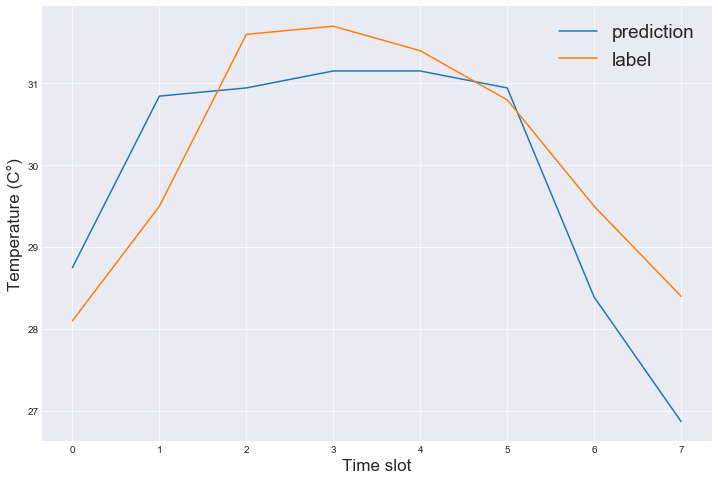

In [67]:
# Chart comparaison between predicted and measured

pand = rf_predictions.select("prediction", "label")
df = pand.toPandas()
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12,8))
plt.plot(df)
plt.legend(df, fontsize=19)
plt.xlabel("Time slot", fontsize=17)
plt.ylabel("Temperature (C°)", fontsize=17)